<a href="https://colab.research.google.com/github/Elsasser67/DataScience21/blob/main/Projekt/Kaggle_Projekt_Schnell_Theo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Link

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=619db6748194630ea39d8f940c7ca9d9eef4daa59f027898e9bb0583c7a35d7e
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
!pip install pillow

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thoschnell","key":"c97b7dc6ac5e4979e58b1f3088161907"}'}

In [5]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
 ! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              229KB  2021-06-18 20:55:49           7852        676  1.0              
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4786        392  0.9375           
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1606        139  1.0              
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset 

# Download Kaggle Data

In [8]:
! kaggle competitions download -c 'retail-products-classification'

 96% 248M/259M [00:01<00:00, 143MB/s]
100% 259M/259M [00:02<00:00, 129MB/s]


In [9]:
! mkdir project

In [10]:
! unzip retail-products-classification.zip -d project

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: project/train/train/B001E6DLOQ.jpg  
  inflating: project/train/train/B001E6DM54.jpg  
  inflating: project/train/train/B001E6DMHW.jpg  
  inflating: project/train/train/B001E6FNQU.jpg  
  inflating: project/train/train/B001E6HVHO.jpg  
  inflating: project/train/train/B001E6HVOC.jpg  
  inflating: project/train/train/B001E6JCR6.jpg  
  inflating: project/train/train/B001E6LAH6.jpg  
  inflating: project/train/train/B001E6LAK8.jpg  
  inflating: project/train/train/B001E6LAUS.jpg  
  inflating: project/train/train/B001E6OCC6.jpg  
  inflating: project/train/train/B001E6TXCU.jpg  
  inflating: project/train/train/B001E6UUT0.jpg  
  inflating: project/train/train/B001E729CK.jpg  
  inflating: project/train/train/B001E76EJ4.jpg  
  inflating: project/train/train/B001E77NJ4.jpg  
  inflating: project/train/train/B001E77TUW.jpg  
  inflating: project/train/train/B001E8133K.jpg  
  inflating: project/t

# Importing libraries

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
#import PIL
import pathlib
import os.path
import os
import sklearn
import glob
from os import path
#from PIL import Image
from keras.preprocessing.image import load_img, img_to_array, image_dataset_from_directory
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras

In [12]:
Categories = ["Electronics","Sports & Outdoors","Cell Phones & Accessories","Automotive","Toys & Games","Tools & Home Improvement","Health & Personal Care","Beauty","Grocery & Gourmet Food","Office Products","Arts, Crafts & Sewing","Pet Supplies","Patio, Lawn & Garden","Clothing, Shoes & Jewelry","Baby","Musical Instruments","Industrial & Scientific","Baby Products","Appliances","All Beauty","All Electronics",]

# Data Wrangling

## Load CSV Data

In [13]:
data_train = pd.read_csv("project/train.csv")
data_test = pd.read_csv("project/test.csv")

In [14]:
data_train.head()

,ImgId,title,description,categories
0,B000HYL1V6,TUNGSTEN SOLDER PICK WITH HANDLE,Solder Pick for picking up molten solder when ...,"Arts, Crafts & Sewing"
1,B00006HXWY,Write Right 98167 Screen Protector for Sony T615C,We all screen. And we all need to protect thos...,Cell Phones & Accessories
2,B000GAWSBS,Casio Mens DBC310-1 Databank 300 Digital Watch...,"Bringing you precision at a glance, the Casio ...","Clothing, Shoes & Jewelry"
3,B000040JOL,Factory-Reconditioned DEWALT DW260KR Heavy-Dut...,Factory-Reconditioned DEWALT DW260KR Heavy-Dut...,Tools & Home Improvement
4,B00006IB78,Energizer 2 in 1 Light,This twoway light features a bright flashlight...,Health & Personal Care


In [15]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46229 entries, 0 to 46228
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ImgId        46229 non-null  object
 1   title        46228 non-null  object
 2   description  45187 non-null  object
 3   categories   46229 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


### Vizualise Data Characteristics

In [16]:
data_train.groupby('categories').count()

,ImgId,title,description
categories,,,
All Beauty,2200,2200,2190
All Electronics,2200,2199,2176
Appliances,2200,2200,2181
"Arts, Crafts & Sewing",2225,2225,2175
Automotive,2200,2200,1999
Baby,2200,2200,2177
Baby Products,2200,2200,2131
Beauty,2202,2202,2149
Cell Phones & Accessories,2200,2200,2188


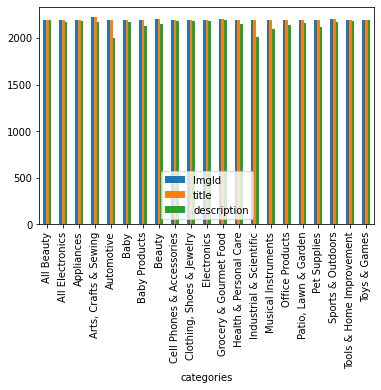

In [17]:
data_train.groupby('categories').count().plot(kind='bar')

We can see that there are entries without description. We shall first clean the data 

### Delete entries without description or title

In [18]:
np.where(pd.isnull(data_train))

(array([   68,   233,   250, ..., 46049, 46064, 46177]),
 array([2, 2, 2, ..., 2, 2, 2]))

In [19]:
data_train = data_train.drop(index=np.where(pd.isnull(data_train))[0])
data_test = data_test.drop(index=np.where(pd.isnull(data_test))[0])

In [20]:
data_train.groupby('categories').count()

,ImgId,title,description
categories,,,
All Beauty,2190,2190,2190
All Electronics,2176,2176,2176
Appliances,2181,2181,2181
"Arts, Crafts & Sewing",2175,2175,2175
Automotive,1999,1999,1999
Baby,2177,2177,2177
Baby Products,2131,2131,2131
Beauty,2149,2149,2149
Cell Phones & Accessories,2188,2188,2188


### Delete entries with no matching Image Id

In [21]:
name_list_train = data_train['ImgId'].tolist()
name_list_test = data_test['ImgId'].tolist()
i = 0
for imgid in name_list_train:
  if not path.exists('project/train/train/' + imgid + '.jpg'):    
    data_train = data_train.drop([data_train.index[i]])
    data_train = data_train.reset_index(drop=True)
  else:
    i+=1

i = 0
for imgid in name_list_test:
  if not path.exists('project/test/test/' + imgid + '.jpg'):    
    data_test = data_test.drop([data_test.index[i]])
    data_test = data_test.reset_index(drop=True)
  else:
    i+=1

### Delete Image with no entries

In [22]:
for filename in os.listdir('project/train/train/'):
  if not filename.split('.jpg')[0] in data_train['ImgId'].values:
    os.remove('project/train/train/' + filename)
    
for filename in os.listdir('project/test/test/'):
  if not filename.split('.jpg')[0] in data_test['ImgId'].values:
    os.remove('project/test/test/' + filename)

## Split CSV Data into Train and Validation Data

In [23]:
data_train, data_val = sklearn.model_selection.train_test_split(data_train, test_size = 0.2, random_state = 1)

## Create Image folders categories

In [24]:
# os.mkdir('/content/project/val')

# for category in Categories:
#   os.mkdir('/content/project/val/' + category)
#   os.mkdir('/content/project/train/' + category)

## Divide the Image Train folder into train and validation

In [25]:
# name_list_val = data_val['ImgId'].tolist()

# for index, row in data_train.iterrows():
#   os.replace('/content/project/train/train/' + row['ImgId'] + '.jpg', '/content/project/train/' + row['categories'] + '/' + row['ImgId'] + '.jpg')

# for index, row in data_val.iterrows():
#   os.replace('/content/project/train/train/' + row['ImgId'] + '.jpg', '/content/project/val/' + row['categories'] + '/' + row['ImgId'] + '.jpg')

# os.rmdir('/content/project/train/train/')

## Read Image Data

In [26]:
name_list_train = data_train['ImgId'].tolist()
name_list_val = data_val['ImgId'].tolist()
name_list_test = data_test['ImgId'].tolist()
i = 0
img_train = []
for imgid in name_list_train:
  if path.exists('project/train/train/' + imgid + '.jpg'):
    image = tf.keras.preprocessing.image.load_img('project/train/train/' + imgid + '.jpg', color_mode='rgb', interpolation='Nearest')
    #input_arr = keras.preprocessing.image.img_to_array(image)
    img_train.append(image)
    i+=1
  else:
    data_train = data_train.drop([data_train.index[i]])
    data_train = data_train.reset_index(drop=True)

counter = 0
for imgid in img_train:
  input_arr = keras.preprocessing.image.img_to_array(imgid)
  img_train[counter] = input_arr / 255
  counter += 1

i = 0
img_val = []
for imgid in name_list_val:
  if path.exists('project/train/train/' + imgid + '.jpg'):
    image = tf.keras.preprocessing.image.load_img('project/train/train/' + imgid + '.jpg', color_mode='rgb', interpolation='Nearest')
    #input_arr = keras.preprocessing.image.img_to_array(image)
    img_val.append(image)
    i+=1
  else:
    data_val = data_val.drop([data_val.index[i]])
    data_val = data_val.reset_index(drop=True)

counter = 0
for imgid in img_val:
  input_arr = keras.preprocessing.image.img_to_array(imgid)
  img_val[counter] = input_arr / 255
  counter += 1

# i = 0
# img_test = []
# for imgid in name_list_test:
#   if path.exists('project/test/test/' + imgid + '.jpg'):    
#     image = tf.keras.preprocessing.image.load_img('project/test/test/' + imgid + '.jpg')
#     #input_arr = keras.preprocessing.image.img_to_array(image)
#     img_test.append(image)
#     i+=1
#   else:
#     data_test = data_test.drop([data_test.index[i]])
#     data_test = data_test.reset_index(drop=True)

In [27]:
# jpegFiles_train = [f for f in os.listdir('project/train/train/') if os.path.isfile(os.path.join('project/train/train/', f))]
# jpegFiles_val = [f for f in os.listdir('project/val/val/') if os.path.isfile(os.path.join('project/val/val/', f))]
# jpegFiles_test = [f for f in os.listdir('project/test/test/') if os.path.isfile(os.path.join('project/test/test/', f))]

In [28]:
# img_train = image_dataset_from_directory('project/train/',image_size=(100,100), shuffle = True, batch_size=32, label_mode='categorical')
# img_val = image_dataset_from_directory('project/val/',image_size=(100,100), shuffle = True, batch_size=32, label_mode='categorical')
# img_test = image_dataset_from_directory('project/test/', image_size=(100,100), shuffle = True, batch_size=32, labels = None)

In [29]:
img_train = np.asarray(img_train)
img_val = np.asarray(img_val)

In [30]:
# del img_train

In [31]:
# img_train = np.asarray(img_train)
# img_val = np.asarray(img_val)
# img_test = np.asarray(img_test)

#img_train = img_train.astype(int, copy=False)
# img_val = img_val.astype(int)
# img_test = img_test.astype(int)

The data contained in data_train are now synchronized with the images and contains only data without NaN and only images that are contained in the folder image

## Sort ImgId

In [32]:
# data_train = data_train.set_index("ImgId")
# data_val = data_val.set_index("ImgId")
# data_test = data_test.set_index("ImgId")

In [33]:
# data_train = data_train.sort_index()
# data_val = data_val.sort_index()
# data_test = data_test.sort_index()

# data_train = data_train.reset_index()
# data_val = data_val.reset_index()
# data_test = data_test.reset_index()

In [34]:
#data_train, data_valid = sklearn.model_selection.train_test_split(data_train, test_size = 0.2, shuffle = False)

## Vizualize an image

'5 inch rubber walker wheels'

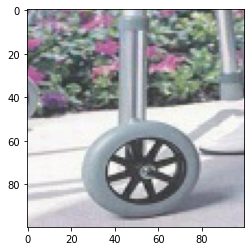

In [35]:
# for images, labels in img_train.take(1):
#   plt.imshow(images[1].numpy().astype("uint8"))
#   plt.axis("off")
plt.imshow(img_train[10000])
data_train.iloc[10000]['description']

In [36]:
#print(data_train.groupby("categories").get_group('All Beauty').first()

# Data Vizualisation

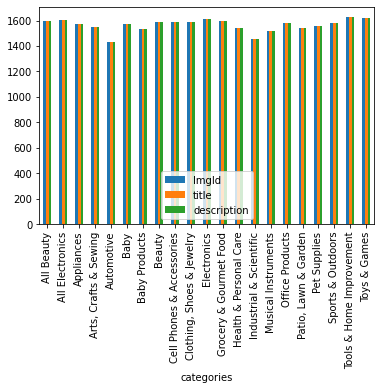

In [37]:
data_train.groupby('categories').count().plot(kind='bar')

We can see that there are a mean of 1500 products for each categories in the train dataset

In [38]:
nbWordsDescription = np.array([])
nbWordsTitle = np.array([])
for index, row in data_train.iterrows():
  nbWordsDescription = np.append(nbWordsDescription, len(row['description'].split()))
  nbWordsTitle = np.append(nbWordsTitle, len(row['title'].split()))

(array([  0., 117., 165., 276., 437., 529., 510., 539., 464., 466., 424.,
        403., 423., 413., 310., 344., 323., 357., 325., 323., 280., 323.,
        348., 338., 349., 311., 294., 294., 290., 377., 271., 293., 322.,
        317., 355., 299., 301., 329., 325., 312., 345., 299., 316., 419.,
        281., 271., 274., 238., 265., 267., 256., 247., 230., 234., 269.,
        211., 220., 227., 203., 220., 196., 217., 206., 177., 203., 226.,
        169., 242., 191., 181., 203., 181., 159., 190., 156., 182., 150.,
        144., 161., 167., 173., 182., 170., 154., 154., 164., 133., 164.,
        127., 121., 129., 131., 140., 125., 120., 114., 107.,  85., 108.,
        115., 103.,  97.,  90.,  91., 109., 117.,  90., 105.,  82.,  75.,
         91.,  83., 102.,  86.,  86.,  73.,  64.,  76.,  75.,  88.,  75.,
         73.,  80.,  66.,  70.,  61.,  63.,  68.,  79.,  74.,  74.,  84.,
         62.,  74.,  70.,  67.,  51.,  71.,  62.,  68.,  58.,  60.,  61.,
         49.,  59.,  52.,  47.,  43., 

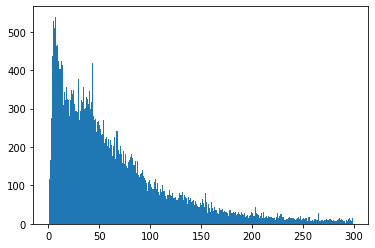

In [39]:
plt.hist(nbWordsDescription, bins=np.arange(300))

(array([0.000e+00, 9.700e+01, 4.280e+02, 1.076e+03, 2.500e+03, 3.840e+03,
        4.288e+03, 4.319e+03, 3.664e+03, 3.136e+03, 2.458e+03, 1.748e+03,
        1.352e+03, 9.500e+02, 6.690e+02, 4.720e+02, 3.160e+02, 2.550e+02,
        2.080e+02, 1.570e+02, 1.290e+02, 7.100e+01, 8.300e+01, 9.200e+01,
        6.300e+01, 5.500e+01, 4.400e+01, 3.900e+01, 2.700e+01, 1.900e+01,
        2.600e+01, 3.100e+01, 4.000e+01, 4.500e+01, 2.600e+01, 1.100e+01,
        1.400e+01, 1.800e+01, 1.500e+01, 1.100e+01, 8.000e+00, 1.000e+00,
        5.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 49 Patch objects>)

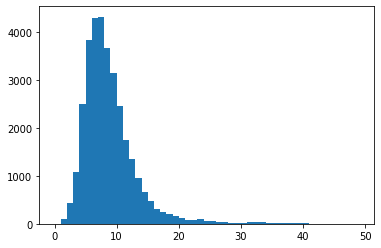

In [40]:
plt.hist(nbWordsTitle, bins=np.arange(50))

In [41]:
print("Minimum Number of words in description : ",nbWordsDescription.min(),"\nMaximum Number of words in description : ", nbWordsDescription.max(),"\nMean Number of words in description : ", nbWordsDescription.mean())

Minimum Number of words in description :  1.0 
Maximum Number of words in description :  1618.0 
Mean Number of words in description :  75.62305115712546


In [42]:
print("Minimum Number of words in title : ",nbWordsTitle.min(),"\nMaximum Number of words in title : ", nbWordsTitle.max(),"\nMean Number of words in title : ", nbWordsTitle.mean())

Minimum Number of words in title :  1.0 
Maximum Number of words in title :  76.0 
Mean Number of words in title :  8.42082825822168


We can see that the mean number of words in description is 75 Words, and in the title 8 Words

In [43]:
del nbWordsDescription, nbWordsTitle

# Model Building

In [44]:
from __future__ import print_function
import tensorflow.keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [45]:
batch_size = 32
num_categories = 21 #fixed!
epochs = 10

## MobileNet

In [46]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras import layers
from tensorflow.keras.applications.mobilenet import MobileNet

In [47]:
num_classes = 21
# model = tf.keras.models.Sequential([
#                                     keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(100,100,3)),
#                                     keras.layers.BatchNormalization(),
#                                     keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
#                                     keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
#                                     keras.layers.BatchNormalization(),
#                                     keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
#                                     keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#                                     keras.layers.BatchNormalization(),
#                                     keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#                                     keras.layers.BatchNormalization(),
#                                     keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#                                     keras.layers.BatchNormalization(),
#                                     keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
#                                     keras.layers.Flatten(),
#                                     keras.layers.Dense(4096, activation='relu'),
#                                     keras.layers.Dropout(0.5),
#                                     keras.layers.Dense(4096, activation='relu'),
#                                     keras.layers.Dropout(0.5),
#                                     keras.layers.Dense(21, activation='softmax')]
#                                     )
input_tensor = Input(shape=(100,100,3))
preprocess = tf.keras.applications.mobilenet.preprocess_input(input_tensor)
model = MobileNet(input_tensor=input_tensor, include_top=False, weights=None, classes=21)(preprocess)
# flatten_layer = tf.keras.layers.Flatten() (model.output)
output = tf.keras.layers.Flatten()(model)
output = tf.keras.layers.Dense(21, activation='softmax')(output)
final_model = tf.keras.Model(inputs=input_tensor, outputs= output)

In [61]:
final_model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy'],
    run_eagerly=True
)

In [62]:
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 100, 100, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 100, 100, 3)       0         
_________________________________________________________________
mobilenet_1.00_None (Functio (None, 3, 3, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 21)                193557    
Total params: 3,422,421
Trainable params: 3,400,533
Non-trainable params: 21,888
______________________________________________

In [50]:
train_categories_column = data_train.loc[:,'categories'].values
val_categories_column = data_val.loc[:,'categories'].values

In [51]:
counter = 0
for i in train_categories_column:
  train_categories_column[counter] = Categories.index(i)
  counter += 1

counter = 0
for i in val_categories_column:
  val_categories_column[counter] = Categories.index(i)
  counter += 1

In [64]:
train_categories_column = np.asarray(train_categories_column).astype(int)
val_categories_column = np.asarray(val_categories_column).astype(int)

train_categories_column = pd.get_dummies(train_categories_column).values
val_categories_column = pd.get_dummies(val_categories_column).values

In [65]:
print(val_categories_column[0])
print(train_categories_column)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [66]:
final_model.fit (
  img_train,
  train_categories_column,
  validation_data=(img_val, val_categories_column),
  epochs=10
)


Epoch 1/10
 194/1027 [====>.........................] - ETA: 4:16 - loss: 1.9701 - accuracy: 0.4013

KeyboardInterrupt: ignored

https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
hey=mpimg.imread('project/train/train/B000O8U1EI.jpg')

In [ ]:
plt.plot('project/train/train/B000O8U1EI.jpg')

In [ ]:
hey = tf.keras.preprocessing.image.load_img('project/train/train/B000O8U1EI.jpg')
input_arr = keras.preprocessing.image.img_to_array(hey)
input_arr = np.array([input_arr])

In [ ]:
result = final_model.predict(input_arr)

In [ ]:
result

In [ ]:
plt.plot(result[0])

In [ ]:
# for data_batch, labels_batch in img_train:
#     print('data batch shape:', data_batch.shape)
#     print('labels batch shape:', labels_batch.shape)
#     break
